In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

n = 30
# data = pd.DataFrame({
#     'stock_type': stock_type,
#     'stock_date': stock_date,
# })

## 构造股票数据
open = np.array(np.random.normal(350, 20, size=n))
close = np.array(np.random.normal(350, 20, size=n))
low = []
high = []
for i in range(n):
    min = open[i]
    max = close[i]
    if open[i] >= close[i]:
        min = close[i]
        max = open[i]
    val1 = np.random.uniform(min-20, max+20, 1)
    if val1 < min:
        val2 = np.random.uniform(min, max+20, 1)
    if val1 > max:
        val2 = np.random.uniform(min-20, max, 1)

    if val1 < val2:
        low.append(val1)
        high.append(val2)
    else:
        low.append(val2)
        high.append(val1)

data = pd.DataFrame({
    'type': np.array(['AAPL' for _ in range(n)]),
    'date': np.array(pd.date_range(start='2018-01-01', periods=n, freq='B')),
    'open': open,
    'high': np.array(high).reshape(n),
    'low': np.array(low).reshape(n),
    'close': close,
    'volume': np.array(np.random.randint(1000000, 3000000, size=n)),
}, columns=['type', 'date', 'open', 'high', 'low', 'close', 'volume'])

data.to_csv('stock_data.csv', index=False)

In [16]:
data = pd.read_csv('stock_data.csv')
print(data.head())

   type        date        open        high         low       close   volume
0  AAPL  2018-01-01  338.677381  327.861316  312.494060  318.265769  2061268
1  AAPL  2018-01-02  332.744836  327.861316  319.756984  319.720911  1469195
2  AAPL  2018-01-03  401.296968  413.195855  370.746811  337.271259  2858179
3  AAPL  2018-01-04  340.376824  356.648964  342.647102  353.171304  2525219
4  AAPL  2018-01-05  335.652726  348.193847  342.647102  363.449232  2777441


In [17]:
## 按指定格式加载股票数据
stock_data = np.loadtxt('stock_data.csv',
            delimiter = ',',
            # dtype = "U4, M8[D], f4, f4, f4, f4, i8",
            dtype = {
                'names':['type', 'date', 'open', 'high', 'low', 'close', 'volume'],
                'formats':['U4', 'M8[D]', 'float32', 'float32', 'float32', 'float32', 'int64']
            },
            usecols=[0,1,2,3,4,5,6], ##使用的列,必须和names的列匹配
            unpack=False, ## 是否拆包,就是降维
            ## 转换器, 列位置: (x)->{}
            converters={
                2: lambda v: np.round(np.float32(v), decimals=2),
                3: lambda v: np.round(np.float32(v), decimals=2),
                4: lambda v: np.round(np.float32(v), decimals=2),
                5: lambda v: np.round(np.float32(v), decimals=2),
            },
            skiprows=1,
            encoding='utf8'

)

print(stock_data.shape)

(30,)


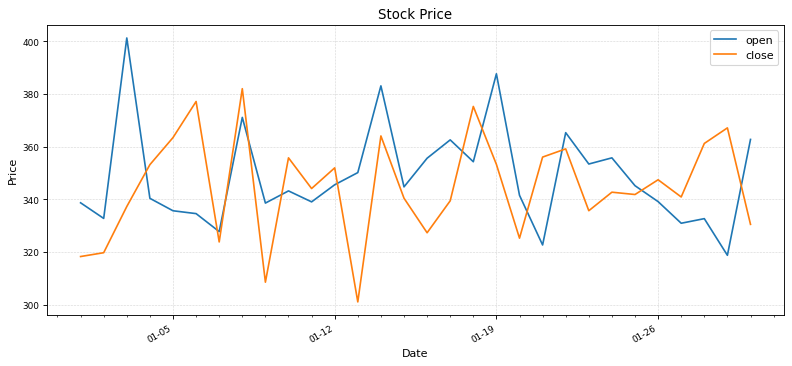

In [18]:
### 画折线图
import matplotlib.pyplot as plt
import matplotlib.dates as md

plt.figure(figsize=(10,5), dpi=80)
plt.title('Stock Price')

plt.plot(data['date'], data['open'], label='open')
plt.plot(data['date'], data['close'], label='close')

plt.xlabel('Date')
plt.ylabel('Price')

ax = plt.gca()
## 日期刻度使用
## https://matplotlib.org/stable/gallery/ticks/date_demo_convert.html
## https://matplotlib.org/stable/gallery/ticks/date_formatters_locators.html
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MONDAY.weekday))
ax.xaxis.set_major_formatter(md.DateFormatter('%m-%d'))
ax.xaxis.set_minor_locator(md.DayLocator())
###
# ax.xaxis.set_major_locator(plt.MultipleLocator(7))
# ax.xaxis.set_minor_locator(plt.MultipleLocator(1))

plt.tick_params(labelsize=8)
plt.grid(linestyle=':', linewidth=0.5)
plt.legend()
plt.tight_layout()
## 可以合理显示日期格式,防止日期格式过于拥挤,会自动调节角度
plt.gcf().autofmt_xdate()
plt.show()

344.7960454176637
343.311026861439


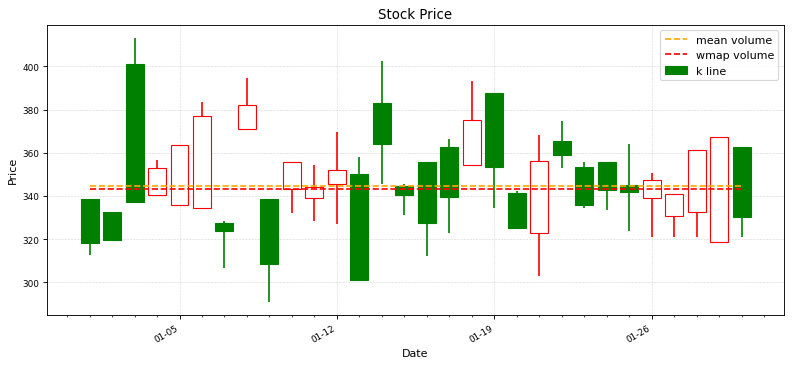

In [19]:
### 画蜡烛图
import matplotlib.pyplot as plt
import matplotlib.dates as md

plt.figure(figsize=(10,5), dpi=80)
plt.title('Stock Price')

tmp = data['open'] > data['close']
color_arr = np.zeros_like(data['open'], dtype='U5')
color_arr[tmp] = 'green'
color_arr[~tmp] = 'white'

edgecolor_arr = np.zeros_like(data['open'], dtype='U5')
edgecolor_arr[tmp] = 'green'
edgecolor_arr[~tmp] = 'red'

plt.bar(data['date'],
        height=data['close'] - data['open'],
        width=0.8,
        bottom=data['open'],
        label='k line',
        color=color_arr,
        edgecolor=edgecolor_arr,
        zorder=10,
        )

plt.vlines(data['date'],
           ymin= data['low'],
           ymax= data['high'],
           color=edgecolor_arr,
           )

mean = np.mean(data['close'])
print(mean)
plt.hlines(mean, xmin=data['date'][0], xmax=data['date'][n-1],
           color='orange', linestyle='--', zorder=10,
           label='mean volume')
wmap = np.average(data.close, weights=data.volume)
print(wmap)
plt.hlines(wmap, xmin=data['date'][0], xmax=data['date'][n-1],
           color='red', linestyle='--', zorder=10,
           label='wmap volume'
           )


plt.xlabel('Date')
plt.ylabel('Price')

ax = plt.gca()
## 日期刻度使用
## https://matplotlib.org/stable/gallery/ticks/date_demo_convert.html
## https://matplotlib.org/stable/gallery/ticks/date_formatters_locators.html
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MONDAY.weekday))
ax.xaxis.set_major_formatter(md.DateFormatter('%m-%d'))
ax.xaxis.set_minor_locator(md.DayLocator())

plt.tick_params(labelsize=8)
plt.grid(linestyle=':', linewidth=0.5)
plt.legend()
plt.tight_layout()
## 可以合理显示日期格式,防止日期格式过于拥挤,会自动调节角度
plt.gcf().autofmt_xdate()
plt.show()


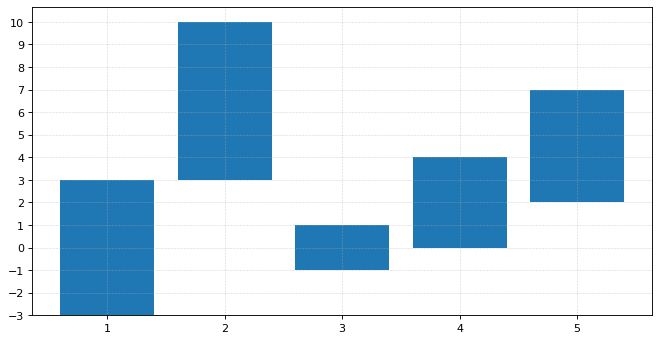

In [20]:
plt.figure(figsize=(10,5), dpi=80)
plt.bar([1,2,3,4,5], height=[6,7,2,4,5], width=0.8, bottom=[-3,3,-1,0,2], label='ok')

ax = plt.gca()
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.grid(linestyle=':', linewidth=0.5)
plt.show()


In [21]:
### numpy常用函数
tmp = np.array([1,2,3,4,5])
tmp.mean(), tmp.std(), tmp.max(), tmp.min(), tmp.argmax(), tmp.argmin()
data2 = np.array([4,1,5,8,0])
np.maximum(tmp, data2)
np.minimum(tmp, data2)
np.median(stock_data['close'])
np.sort(stock_data['close'])

array([301.03, 308.52, 318.27, 319.72, 323.81, 325.24, 327.3 , 330.49,
       335.67, 337.27, 339.43, 340.43, 340.9 , 341.83, 342.71, 344.1 ,
       347.43, 351.95, 353.17, 353.28, 355.76, 356.05, 359.16, 361.22,
       363.45, 364.08, 367.14, 375.28, 377.16, 382.03], dtype=float32)

In [22]:
## 加权平均
import numpy as np
print(stock_data.shape)
print(data.shape)
close_p = np.reshape(data.close, (1, -1))
volume_total = np.reshape(data.volume, (1, -1))

wmap = np.average(data.close, weights=data.volume)
wmap, np.mean(data.close)

(30,)
(30, 7)


(np.float64(343.311026861439), np.float64(344.7960454176637))

In [23]:
np.std(stock_data['close']) ## 总体标准差 s
np.std(stock_data['close'], ddof=1) ## 样本标准差 s'

np.float32(20.016708)

### 加权平均
S=[$s_1,s_2,s_3,...,s_n$]

W=[$w_1,w_2,w_3,...,w_n$]

np.average(s, weights=w)

加权平均值 = $\frac{s_1*w_1 + s_2*w_2 + s_3*w_3 + ... + s_n*w_n}{w_1 + w_2 + w_3 + ... + w_n}$

当W都为1时,就是算术平均

### 时间加权平均
时间加权平均就是w的权重系数,换成时间的权重系数,时间越玩,权重越大

样本: S = [$s_1, s_2, ..., s_n$]

均值: M = $\frac{s_1 + s_2 + ... + s_n}{n}$

离差: D = [$d_1, d_2, ..., d_n], d_i=s_i-m$

方差: Q = [$q_1, q_2, ..., q_n], q_i=d_i^2$

总体方差: V = $\frac{q_1 + q_2 + ... + q_n}{n}$

总体标准差: s = $\sqrt(v)$

样本方差: v' = $\frac{q_1 + q_2 + ... + q_n}{n-1}$

样本标准差: s' = $\sqrt(v')$